In [1]:
%pylab inline

import os
from scipy.interpolate import interp1d as linear
from scipy.misc import derivative

from styles.paper import *
from styles.colors import *
from styles.labels import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
change_name = lambda name, strip: "spSpec"+name.lstrip(strip).replace(".log", ".fit")

In [3]:
#load G05 indexes from SDSS sample
catalog = genfromtxt("data/sample-obs/catalog.txt", dtype=None, names=True)

g05_table = genfromtxt(os.path.expandvars("$phd/notebooks/data/sample-obs/G05_indexes_sample.txt"), dtype=None, names=True)

g05_mod_name = loadtxt(os.path.expandvars("$phd/notebooks/data/sample-obs/G05_indexes_from_mod.log"), dtype=np.str, usecols=(0,))
g05_mindx = loadtxt(os.path.expandvars("$phd/notebooks/data/sample-obs/G05_indexes_from_mod.log"), usecols=(1,2,3,4,5))
g05_mindx = g05_mindx[argsort(g05_mod_name)]

g05_obs_name = loadtxt(os.path.expandvars("$phd/notebooks/data/sample-obs/G05_indexes_from_obs.log"), dtype=np.str, usecols=(0,))
g05_oindx = loadtxt(os.path.expandvars("$phd/notebooks/data/sample-obs/G05_indexes_from_obs.log"), usecols=(1,2,3,4,5))
g05_oindx = g05_oindx[argsort(g05_obs_name)]

m16_param = genfromtxt(os.path.expandvars("$phd/inputs/real_deal/outs/spec/dynbas_output.log"), dtype=None, names=True)
m16_param["input_file"] = array([change_name(name, "dynbasfit_processed_SPEC_") for name in m16_param["input_file"]])

g05_param = genfromtxt(os.path.expandvars("$phd/notebooks/data/sample-obs/gal2005.txt"), dtype=None, names=True)

cat_in_g05 = array([gal in g05_param["input_file"] for gal in catalog["input_file"]], dtype=np.bool)
m16_in_g05 = array([gal in g05_param["input_file"] for gal in m16_param["input_file"]], dtype=np.bool)

In [4]:
print all(g05_param["input_file"]==catalog["input_file"][cat_in_g05])
print all(m16_param["input_file"][m16_in_g05]==catalog["input_file"][cat_in_g05])
print all(np.sort(g05_mod_name)[m16_in_g05]==catalog["input_file"][cat_in_g05])
print all(np.sort(g05_mod_name)[m16_in_g05]==g05_table["input_file"][m16_in_g05])

True
True
True
True


In [5]:
cat = catalog[cat_in_g05]
m16 = m16_param[m16_in_g05]
g05 = g05_param
obs = np.copy(g05_table[m16_in_g05])
mod = np.copy(g05_table[m16_in_g05])

for i, kw in enumerate("D4000 Hbeta Hdg Mg2Fe MgFep".split()): mod[kw] = g05_mindx[m16_in_g05, i]
for i, kw in enumerate("D4000 Hbeta Hdg Mg2Fe MgFep".split()): obs[kw] = g05_oindx[m16_in_g05, i]

col = cat["u_mag"]-cat["r_mag"]

In [6]:
idir = os.path.expandvars("$phd/notebooks/data/ssp-model-props")
odir = os.path.expandvars("$HOME/Documents/Publications/mejia+2016")

ax_xlabel = {
    "age": r"\bf \log{t/\text{yr}}"
}
ax_ylabels = {
    "D4000": r"\bf D$4000$",
    "Hbeta": r"\bf H$\beta$",
    "Hdg": r"\bf H$\delta_A$+H$\gamma_A$",
    "Mg2Fe": r"\bf [Mg${}_2$Fe]",
    "MgFep": r"\bf [MgFe]'",
    "CaII triplet": r"\bf Ca\textsc{ii} Triplet",
    "u-g": r"\bf $u-g$",
    "u-r": r"\bf $u-r$",
    "g-r": r"\bf $g-r$",
    "g-i": r"\bf $g-i$",
    "g-z": r"\bf $g-z$",
    "r-i": r"\bf $r-i$",
    "r-z": r"\bf $r-z$",
    "i-z": r"\bf $i-z$",
    "M/L_u": r"\bf $M_\star/L_u$",
    "M/L_g": r"\bf $M_\star/L_g$",
    "M/L_r": r"\bf $M_\star/L_r$",
    "M/L_i": r"\bf $M_\star/L_i$",
    "M/L_z": r"\bf $M_\star/L_z$",
    "L_u": r"\bf $L_u$",
    "L_g": r"\bf $L_g$",
    "L_r": r"\bf $L_r$",
    "L_i": r"\bf $L_i$",
    "L_z": r"\bf $L_z$"
}
libraries = {
    "stelib": {
        "m32": r"0.0004",
        "m42": r"0.004",
        "m52": r"0.008",
        "m62": r"0.02",
        "m72": r"0.05"
    },
    "miles": {
        "z001": r"0.001",
        "z004": r"0.004",
        "z008": r"0.008",
        "z017": r"0.017",
        "z030": r"0.03",
        "z040": r"0.04"
    }
}
metallicities = {
    r"0.0004": ("m32", "stelib"),
    r"0.004": ("m42", "stelib"),
    r"0.008": ("m52", "stelib"),
    r"0.02": ("m62", "stelib"),
    r"0.05": ("m72", "stelib"),
    r"0.001": ("z001", "miles"),
    r"0.004": ("z004", "miles"),
    r"0.008": ("z008", "miles"),
    r"0.017": ("z017", "miles"),
    r"0.03": ("z030", "miles"),
    r"0.04": ("z040", "miles")
}
indx_maps = {
    "6lsindx_sed": {
        "Mg2": 12,
        "Hbeta": 9,
        "Fe4531": 7,
        "Fe5015": 10,
        "Mgb": 13,
        "Fe5270": 14,
        "Fe5335": 15,
    },
    "7lsindx_sed": {
        "Hdelta_A": 2,
        "Hgamma_A": 3,
        "D4000": 5,
        "CaII8498": 7,
        "CaII8542": 8,
        "CaII8662": 9
    },
    "1ABmag": {
        "u-g": ((1,3), lambda mags: mags[:,0]-mags[:,1]),
        "u-r": ((1,3), lambda mags: mags[:,0]-mags[:,1]),
        "g-r": ((2,3), lambda mags: mags[:,0]-mags[:,1]),
        "g-i": ((2,4), lambda mags: mags[:,0]-mags[:,1]),
        "g-z": ((2,5), lambda mags: mags[:,0]-mags[:,1]),
        "r-i": ((3,4), lambda mags: mags[:,0]-mags[:,1]),
        "r-z": ((3,5), lambda mags: mags[:,0]-mags[:,1]),
        "i-z": ((4,5), lambda mags: mags[:,0]-mags[:,1]),
        "L_u": (1, lambda mag: 10**(-0.4*(mag-5.46))),
        "L_g": (2, lambda mag: 10**(-0.4*(mag-5.21))),
        "L_r": (3, lambda mag: 10**(-0.4*(mag-4.50))),
        "L_i": (4, lambda mag: 10**(-0.4*(mag-4.16))),
        "L_z": (5, lambda mag: 10**(-0.4*(mag-3.99)))
    }
}
file_maps = {
    "tau0": {
        "1color": {
            "age": 0
        },
        "4color": {
            "M": 5
        }
    },
    "tau2": {
        "w_age_rf": {
            "age": 13
        },
        "4color": {
            "M": 5
        }
    },
    "tau5": {
        "w_age_rf": {
            "age": 13
        },
        "4color": {
            "M": 5
        }
    }
}
for modl in file_maps: file_maps[modl].update(indx_maps)

Mg2Fe = lambda Mg2, Fe4531, Fe5015: 0.6*Mg2 + 0.4*log10(abs(Fe4531+Fe5015))
MgFep = lambda Mgb, Fe5270, Fe5335: sqrt(abs(Mgb*(0.72*Fe5270+0.28*Fe5335)))
Hdg = lambda Hdelta, Hgamma: Hdelta + Hgamma
CaII_triplet = lambda CaII8498, CaII8542, CaII8662: CaII8498 + CaII8542 + CaII8662
MLum = lambda M, L: M/L
MLum_err = lambda MLR: MLR*(0.05/1.0857)

def walk_map(library, model):
    return {
        zkw: {
            field: loadtxt("{}/{}/{}_{}.{}".format(idir,library,model,zkw,ftype), usecols=(icol,)) if not hasattr(icol,"__getitem__") else icol[1](loadtxt("{}/{}/{}_{}.{}".format(idir,library,model,zkw,ftype), usecols=((icol[0],) if not hasattr(icol[0],"__getitem__") else icol[0]))) for ftype in file_maps[model] for field, icol in file_maps[model][ftype].iteritems()
        } for zkw in libraries[library]
    }

def add_ingredient(stores, ingredients_list, directions, ingredient_name):
    for store in stores.values():
        store[ingredient_name] = directions(*tuple(store[ingredient] for ingredient in ingredients_list))
    return None

In [7]:
tau0_stelib = walk_map("stelib", "tau0")
tau2_stelib = walk_map("stelib", "tau2")
tau5_stelib = walk_map("stelib", "tau5")

add_ingredient(tau0_stelib, ("Mg2","Fe4531","Fe5015"), Mg2Fe, "Mg2Fe")
add_ingredient(tau0_stelib, ("Mgb","Fe5270","Fe5335"), MgFep, "MgFep")
add_ingredient(tau0_stelib, ("Hdelta_A","Hgamma_A"), Hdg, "Hdg")
add_ingredient(tau0_stelib, ("M", "L_u"), MLum, "M/L_u")
add_ingredient(tau0_stelib, ("M", "L_g"), MLum, "M/L_g")
add_ingredient(tau0_stelib, ("M", "L_r"), MLum, "M/L_r")
add_ingredient(tau0_stelib, ("M", "L_i"), MLum, "M/L_i")
add_ingredient(tau0_stelib, ("M", "L_z"), MLum, "M/L_z")
add_ingredient(tau0_stelib, ("M/L_u",), MLum_err, "err_M/L_u")
add_ingredient(tau0_stelib, ("M/L_g",), MLum_err, "err_M/L_g")
add_ingredient(tau0_stelib, ("M/L_r",), MLum_err, "err_M/L_r")
add_ingredient(tau0_stelib, ("M/L_i",), MLum_err, "err_M/L_i")
add_ingredient(tau0_stelib, ("M/L_z",), MLum_err, "err_M/L_z")

add_ingredient(tau2_stelib, ("Mg2","Fe4531","Fe5015"), Mg2Fe, "Mg2Fe")
add_ingredient(tau2_stelib, ("Mgb","Fe5270","Fe5335"), MgFep, "MgFep")
add_ingredient(tau2_stelib, ("Hdelta_A","Hgamma_A"), Hdg, "Hdg")
add_ingredient(tau2_stelib, ("M", "L_u"), MLum, "M/L_u")
add_ingredient(tau2_stelib, ("M", "L_g"), MLum, "M/L_g")
add_ingredient(tau2_stelib, ("M", "L_r"), MLum, "M/L_r")
add_ingredient(tau2_stelib, ("M", "L_i"), MLum, "M/L_i")
add_ingredient(tau2_stelib, ("M", "L_z"), MLum, "M/L_z")
add_ingredient(tau2_stelib, ("M/L_u",), MLum_err, "err_M/L_u")
add_ingredient(tau2_stelib, ("M/L_g",), MLum_err, "err_M/L_g")
add_ingredient(tau2_stelib, ("M/L_r",), MLum_err, "err_M/L_r")
add_ingredient(tau2_stelib, ("M/L_i",), MLum_err, "err_M/L_i")
add_ingredient(tau2_stelib, ("M/L_z",), MLum_err, "err_M/L_z")

add_ingredient(tau5_stelib, ("Mg2","Fe4531","Fe5015"), Mg2Fe, "Mg2Fe")
add_ingredient(tau5_stelib, ("Mgb","Fe5270","Fe5335"), MgFep, "MgFep")
add_ingredient(tau5_stelib, ("Hdelta_A","Hgamma_A"), Hdg, "Hdg")
add_ingredient(tau5_stelib, ("M", "L_u"), MLum, "M/L_u")
add_ingredient(tau5_stelib, ("M", "L_g"), MLum, "M/L_g")
add_ingredient(tau5_stelib, ("M", "L_r"), MLum, "M/L_r")
add_ingredient(tau5_stelib, ("M", "L_i"), MLum, "M/L_i")
add_ingredient(tau5_stelib, ("M", "L_z"), MLum, "M/L_z")
add_ingredient(tau5_stelib, ("M/L_u",), MLum_err, "err_M/L_u")
add_ingredient(tau5_stelib, ("M/L_g",), MLum_err, "err_M/L_g")
add_ingredient(tau5_stelib, ("M/L_r",), MLum_err, "err_M/L_r")
add_ingredient(tau5_stelib, ("M/L_i",), MLum_err, "err_M/L_i")
add_ingredient(tau5_stelib, ("M/L_z",), MLum_err, "err_M/L_z")

In [8]:
tau0_miles = walk_map("miles", "tau0")
tau2_miles = walk_map("miles", "tau2")
tau5_miles = walk_map("miles", "tau5")

add_ingredient(tau0_miles, ("Mg2","Fe4531","Fe5015"), Mg2Fe, "Mg2Fe")
add_ingredient(tau0_miles, ("Mgb","Fe5270","Fe5335"), MgFep, "MgFep")
add_ingredient(tau0_miles, ("Hdelta_A","Hgamma_A"), Hdg, "Hdg")
add_ingredient(tau0_miles, ("M", "L_u"), MLum, "M/L_u")
add_ingredient(tau0_miles, ("M", "L_g"), MLum, "M/L_g")
add_ingredient(tau0_miles, ("M", "L_r"), MLum, "M/L_r")
add_ingredient(tau0_miles, ("M", "L_i"), MLum, "M/L_i")
add_ingredient(tau0_miles, ("M", "L_z"), MLum, "M/L_z")
add_ingredient(tau0_miles, ("M/L_u",), MLum_err, "err_M/L_u")
add_ingredient(tau0_miles, ("M/L_g",), MLum_err, "err_M/L_g")
add_ingredient(tau0_miles, ("M/L_r",), MLum_err, "err_M/L_r")
add_ingredient(tau0_miles, ("M/L_i",), MLum_err, "err_M/L_i")
add_ingredient(tau0_miles, ("M/L_z",), MLum_err, "err_M/L_z")

add_ingredient(tau2_miles, ("Mg2","Fe4531","Fe5015"), Mg2Fe, "Mg2Fe")
add_ingredient(tau2_miles, ("Mgb","Fe5270","Fe5335"), MgFep, "MgFep")
add_ingredient(tau2_miles, ("Hdelta_A","Hgamma_A"), Hdg, "Hdg")
add_ingredient(tau2_miles, ("M", "L_u"), MLum, "M/L_u")
add_ingredient(tau2_miles, ("M", "L_g"), MLum, "M/L_g")
add_ingredient(tau2_miles, ("M", "L_r"), MLum, "M/L_r")
add_ingredient(tau2_miles, ("M", "L_i"), MLum, "M/L_i")
add_ingredient(tau2_miles, ("M", "L_z"), MLum, "M/L_z")
add_ingredient(tau2_miles, ("M/L_u",), MLum_err, "err_M/L_u")
add_ingredient(tau2_miles, ("M/L_g",), MLum_err, "err_M/L_g")
add_ingredient(tau2_miles, ("M/L_r",), MLum_err, "err_M/L_r")
add_ingredient(tau2_miles, ("M/L_i",), MLum_err, "err_M/L_i")
add_ingredient(tau2_miles, ("M/L_z",), MLum_err, "err_M/L_z")

add_ingredient(tau5_miles, ("Mg2","Fe4531","Fe5015"), Mg2Fe, "Mg2Fe")
add_ingredient(tau5_miles, ("Mgb","Fe5270","Fe5335"), MgFep, "MgFep")
add_ingredient(tau5_miles, ("Hdelta_A","Hgamma_A"), Hdg, "Hdg")
add_ingredient(tau5_miles, ("M", "L_u"), MLum, "M/L_u")
add_ingredient(tau5_miles, ("M", "L_g"), MLum, "M/L_g")
add_ingredient(tau5_miles, ("M", "L_r"), MLum, "M/L_r")
add_ingredient(tau5_miles, ("M", "L_i"), MLum, "M/L_i")
add_ingredient(tau5_miles, ("M", "L_z"), MLum, "M/L_z")
add_ingredient(tau5_miles, ("M/L_u",), MLum_err, "err_M/L_u")
add_ingredient(tau5_miles, ("M/L_g",), MLum_err, "err_M/L_g")
add_ingredient(tau5_miles, ("M/L_r",), MLum_err, "err_M/L_r")
add_ingredient(tau5_miles, ("M/L_i",), MLum_err, "err_M/L_i")
add_ingredient(tau5_miles, ("M/L_z",), MLum_err, "err_M/L_z")

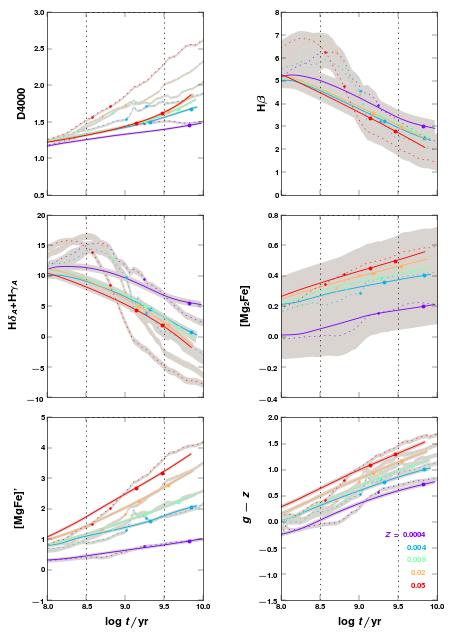

In [9]:
colors = cm.rainbow(linspace(0,1,len(libraries["stelib"])))
properties = ["D4000", "Hbeta", "Hdg", "Mg2Fe", "MgFep", "g-z"]
sigmas = [0.016, 0.352, 0.563, 0.130, 0.052, 0.04]

mask = m16["log_t_L_mod"]<9.0

#fig, axs = subplots(3, 2, sharex=True, figsize=(3.3,5))
fig, axs = subplots(3, 2, sharex=True, figsize=(5,7))
xlim(8.0,10)

axs = axs.ravel()
for i in xrange(axs.size):
    prop = properties[i]

    axs[i].axvspan(8.5, 9.5, lw=0.7, ls=":", ec=samples["dark"], fc="none")
    axs[i].set_ylabel(ax_ylabels[prop])
    if axs[i].is_last_row(): axs[i].set_xlabel(ax_xlabel["age"])
    
    for j, zkw in enumerate(sorted(libraries["stelib"])):
        t_sf_tau0 = linear(tau0_stelib[zkw]["u-r"], tau0_stelib[zkw]["age"], bounds_error=False, fill_value="extrapolate")([1.47, 1.81])
        t_sf_tau5 = linear(tau5_stelib[zkw]["u-r"], tau5_stelib[zkw]["age"], bounds_error=False, fill_value="extrapolate")([1.47, 1.81])
        p_sf_tau0 = linear(tau0_stelib[zkw]["age"], tau0_stelib[zkw][prop], bounds_error=False, fill_value="extrapolate")(t_sf_tau0)
        p_sf_tau5 = linear(tau5_stelib[zkw]["age"], tau5_stelib[zkw][prop], bounds_error=False, fill_value="extrapolate")(t_sf_tau5)

        axs[i].plot(tau0_stelib[zkw]["age"], tau0_stelib[zkw][prop], ":", lw=0.5, color=colors[j])
        axs[i].plot(tau5_stelib[zkw]["age"], tau5_stelib[zkw][prop], "-", lw=0.7, color=colors[j])

        axs[i].plot(t_sf_tau0, p_sf_tau0, "o", ms=2, mew=0, color=colors[j])
        axs[i].plot(t_sf_tau5, p_sf_tau5, "o", ms=3, mew=0, color=colors[j])
        
        axs[i].fill_between(tau0_stelib[zkw]["age"], tau0_stelib[zkw][prop]-sigmas[i], tau0_stelib[zkw][prop]+sigmas[i], lw=0, color=samples["light"])
        axs[i].fill_between(tau5_stelib[zkw]["age"], tau5_stelib[zkw][prop]-sigmas[i], tau5_stelib[zkw][prop]+sigmas[i], lw=0, color=samples["light"])

        if i==5:
            axs[i].text(0.93, 0.35-j*0.07, (r"$Z={}$" if j==0 else r"${}$").format(libraries["stelib"][zkw]), color=colors[j], fontsize="x-small", ha="right", transform=axs[i].transAxes)

        #show real life examples from the SDSS
#     if prop!="g-z":
#         #for index in xrange(10): axs[i].errorbar(g05[mask][index]["log_t_L_mod"], mod[mask][index][prop], mod[mask][index]["{0}_err".format(prop)], ls="none", mew=1, ecolor=colors[argmin(abs(array(map(eval, sorted(libraries["stelib"].values())))-0.02*10**g05[mask][index]["log_Z_L_mod"]))])
#         for index in xrange(20): axs[i].errorbar(g05[mask][index]["log_t_L_mod"], obs[mask][index][prop], obs[mask][index]["{0}_err".format(prop)], ls="none", mew=1, ecolor=samples["dark"])
#     else:
#         for index in xrange(20):
#             g_z = cat["g_mag"][mask][index] - cat["z_mag"][mask][index]
#             g_z_err = sqrt(cat["g_err"][mask][index]**2+cat["z_err"][mask][index]**2)
#             #axs[i].errorbar(g05[mask][index]["log_t_L_mod"], g_z, g_z_err, ls="none", mew=1, ecolor=colors[argmin(abs(array(map(eval, sorted(libraries["stelib"].values())))-0.02*10**g05[mask][index]["log_Z_L_mod"]))])
#             axs[i].errorbar(g05[mask][index]["log_t_L_mod"], g_z, g_z_err, ls="none", mew=1, ecolor=samples["dark"])

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)

fig.savefig("{}/g05_indexes".format(odir))

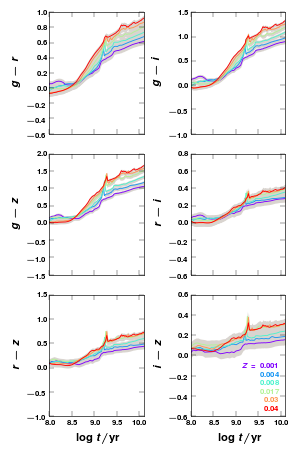

In [10]:
colors = cm.rainbow(linspace(0,1,len(libraries["miles"])))
properties = ["g-r", "g-i", "g-z", "r-i", "r-z", "i-z"]
sigmas = [0.04, 0.04, 0.05, 0.04, 0.05, 0.05]

fig, axs = subplots(3, 2, sharex=True, figsize=(3.3,5))
xlim(8.0,10.1)

axs = axs.ravel()
for i in xrange(axs.size):
    prop = properties[i]

    axs[i].set_ylabel(ax_ylabels[prop])
    if axs[i].is_last_row(): axs[i].set_xlabel(ax_xlabel["age"])
    
    for j, zkw in enumerate(sorted(libraries["miles"])):
        axs[i].fill_between(tau0_miles[zkw]["age"], tau0_miles[zkw][prop]-sigmas[i], tau0_miles[zkw][prop]+sigmas[i], lw=0, color=samples["light"])
        axs[i].plot(tau0_miles[zkw]["age"], tau0_miles[zkw][prop], "-", lw=0.7, color=colors[j])

        if i==5:
            axs[i].text(0.93, 0.40-j*0.07, (r"$Z={}$" if j==0 else r"${}$").format(libraries["miles"][zkw]), color=colors[j], fontsize="x-small", ha="right", transform=axs[i].transAxes)

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)

fig.savefig("{}/color_indexes".format(odir))

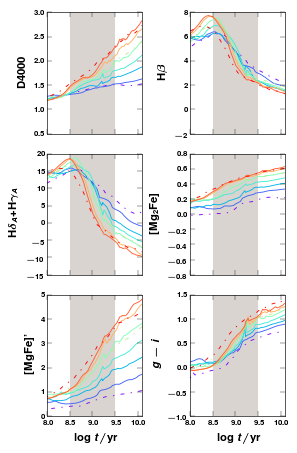

In [11]:
colors = cm.rainbow(linspace(0,1,len(metallicities)))
properties = ["D4000", "Hbeta", "Hdg", "Mg2Fe", "MgFep", "g-i"]

fig, axs = subplots(3, 2, sharex=True, figsize=(3.3,5))
xlim(8.0,10.1)

axs = axs.ravel()
for i in xrange(axs.size):
    prop = properties[i]

    axs[i].axvspan(8.5, 9.5, lw=0, fc=samples["light"])
    axs[i].set_ylabel(ax_ylabels[prop])
    if axs[i].is_last_row(): axs[i].set_xlabel(ax_xlabel["age"])
    
    for j, Z in enumerate(sorted(metallicities)):
        zkw, lib = metallicities[Z]
        
        if lib=="stelib":
            axs[i].plot(tau0_stelib[zkw]["age"], tau0_stelib[zkw][prop], "-.", lw=0.7, color=colors[j])
        elif lib=="miles":
            axs[i].plot(tau0_miles[zkw]["age"], tau0_miles[zkw][prop], "-", lw=0.7, color=colors[j])

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)

fig.savefig("{}/stelib_vs_miles".format("./img"))

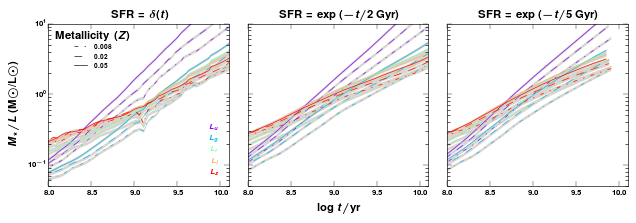

In [12]:
fig, axs = subplots(1, 3, sharey=True, sharex=True, figsize=(7,2.5))
xlim(8.0, 10.1)
ylim(5e-2, 1e1)
axs[0].set_ylabel(r"\bf $M_\star/L$ (M$\odot$/L$\odot$)")
axs[1].set_xlabel(ax_xlabel["age"])

properties = ["M/L_u", "M/L_g", "M/L_r", "M/L_i", "M/L_z"]
sigmas = ["err_M/L_u", "err_M/L_g", "err_M/L_r", "err_M/L_i", "err_M/L_z"]
linestyles = ["-.", "--", "-"]
colors = cm.rainbow(linspace(0,1,len(properties)))
titles = [r"\bf $\text{SFR}=\delta(t)$", r"\bf $\text{SFR}=\exp{(-t/2\,\text{Gyr})}$", r"\bf $\text{SFR}=\exp{(-t/5\,\text{Gyr})}$"]

mlr = [tau0_stelib, tau2_stelib, tau5_stelib]
for i in xrange(axs.size):
    axs[i].set_title(titles[i])

    for k, prop in enumerate(properties):
        for j, zkw in enumerate(sorted(libraries["stelib"])[2:]):
            axs[i].semilogy(mlr[i][zkw]["age"], mlr[i][zkw][prop], linestyles[j], color=colors[k], lw=0.5, label=r"\bf ${}$".format(libraries["stelib"][zkw]))
            axs[i].fill_between(mlr[i][zkw]["age"], mlr[i][zkw][prop]-mlr[i][zkw][sigmas[k]], mlr[i][zkw][prop]+mlr[i][zkw][sigmas[k]], lw=0, color=samples["light"])
        
        if i==0 and k==0:
            for line in axs[i].legend(loc=0, title=r"\bf Metallicity ($Z$)").get_lines(): line.set_color("k")
        if i==0:
            axs[i].text(0.93, 0.35-k*0.07, ax_ylabels[prop.strip("M/")], color=colors[k], fontsize="x-small", ha="right", transform=axs[i].transAxes)
        
fig.tight_layout() 
fig.savefig("{}/mass-to-light".format(odir))

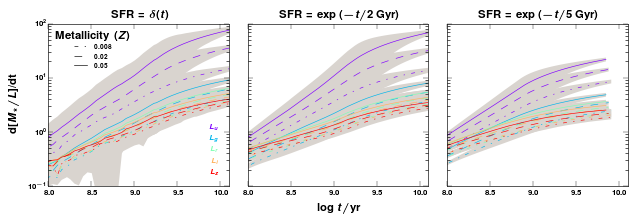

In [13]:
fig, axs = subplots(1, 3, sharey=True, sharex=True, figsize=(7,2.5))
xlim(8.0, 10.1)
ylim(1e-1, 1e2)
axs[0].set_ylabel(r"\bf $\text{d}[M_\star/L$]/\text{d}t")
axs[1].set_xlabel(ax_xlabel["age"])

properties = ["M/L_u", "M/L_g", "M/L_r", "M/L_i", "M/L_z"]
linestyles = ["-.", "--", "-"]
colors = cm.rainbow(linspace(0,1,len(properties)))
titles = [r"\bf $\text{SFR}=\delta(t)$", r"\bf $\text{SFR}=\exp{(-t/2\,\text{Gyr})}$", r"\bf $\text{SFR}=\exp{(-t/5\,\text{Gyr})}$"]

mlr = [tau0_stelib, tau2_stelib, tau5_stelib]
for i in xrange(axs.size):
    axs[i].set_title(titles[i])

    for k, prop in enumerate(properties):
        for j, zkw in enumerate(sorted(libraries["stelib"])[2:]):
            f = linear(mlr[i][zkw]["age"], mlr[i][zkw][prop], bounds_error=False, fill_value="extrapolate")
            f_err = linear(mlr[i][zkw]["age"], mlr[i][zkw][prop]**2/mlr[i][zkw]["M"], bounds_error=False, fill_value="extrapolate")
            
            x = mlr[i][zkw]["age"]
            y = array([derivative(f, x[n]) for n in xrange(x.size)])
            y_err = array([derivative(f_err, x[n]) for n in xrange(x.size)])*0.05*mlr[i][zkw][prop.strip("M/")]/1.0857
            axs[i].semilogy(x, y, linestyles[j], color=colors[k], lw=0.5, label=r"\bf ${}$".format(libraries["stelib"][zkw]))
            axs[i].fill_between(x, y-y_err, y+y_err, lw=0, color=samples["light"])
        
        if i==0 and k==0:
            for line in axs[i].legend(loc=0, title=r"\bf Metallicity ($Z$)").get_lines(): line.set_color("k")
        if i==0:
            axs[i].text(0.93, 0.35-k*0.07, ax_ylabels[prop.strip("M/")], color=colors[k], fontsize="x-small", ha="right", transform=axs[i].transAxes)
        
fig.tight_layout() 
fig.savefig("{}/diff-mass-to-light".format(odir))

In [14]:
#Si la forma del espectro no cambia en el tiempo, las curvas M/L(t) son paralelas entre una banda y otra.
#Mostrar 3 puntos a masa constante. Deberian coincidir en M/L y edad para poblaciones viejas.
#Mostrar la evolución de un modelo tau de la siguiente manera:
# - separar los espectros de las poblaciones más viejas y más jóvenes que 1Gaño
# - mostrar los espectros de las dos poblaciones en colores diferentes y la suma de ambos en negro
# - mostrar la edad pesada por la masa y la pesada por el flujo
# - mostrar la SSP que se corresponda con la edad pesada por la masa
#
#Lo que espero que pase es que las dos poblaciones evolucionarán a lo largo del tiempo de manera diferente.
#El espectro de la población vieja subyacente cambiará muy poco su forma a lo largo de la historia, solo el
#nivel de flujo cambiará.
#El espectro de la población que domina la luz integrada cambiará su forma y nivel de flujo constantemente.